In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pysindy as ps
from pysindy.feature_library.polynomial_library import PolynomialLibrary

from scipy.integrate import solve_ivp

In [100]:
data = np.load("/export/data/isulzer/DON-vs-NODE/data/lorenzo_data/lorenzo_data_small.npy")[::1000,:,:]
print(data.shape)

(672, 16, 10)


(672, 16, 10) (672, 10) (672, 10, 10)
[1.4880797e-03 1.6604563e-08 2.8525671e-11 1.8411049e-15 1.3442118e-19
 5.2618904e-24 4.8426998e-25 2.5517364e-27 3.3080638e-30 5.7502159e-35]


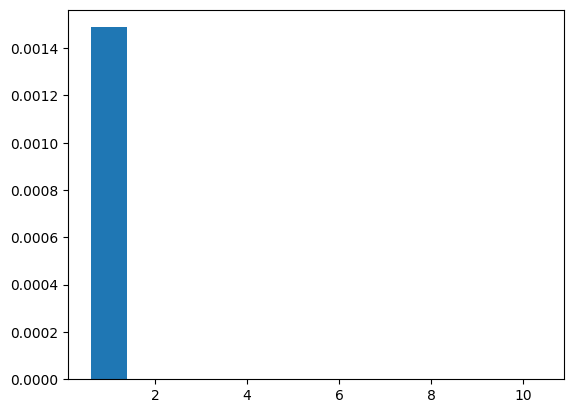

In [101]:
data = data - data.mean(axis=(0,1))
u, s, vh = np.linalg.svd(data, full_matrices=False)
print(u.shape, s.shape, vh.shape)
variances = s**2 / (data.shape[0]-1)
explained_variances = variances / np.sum(variances)
var_mean = explained_variances.mean(axis=0)
plt.bar(range(1, len(var_mean)+1), var_mean)
print(var_mean)

In [102]:
data = np.load("/export/data/isulzer/DON-vs-NODE/data/osu2008/train_data.npy")
data.shape

(800, 100, 29)

In [103]:
data = data - data.mean(axis=(0,1))
# data = data.reshape((800*100), 29)
data.shape

(800, 100, 29)

In [104]:
u, s, vh = np.linalg.svd(data, full_matrices=False)
print(u.shape, s.shape, vh.shape)

(800, 100, 29) (800, 29) (800, 29, 29)


<BarContainer object of 29 artists>

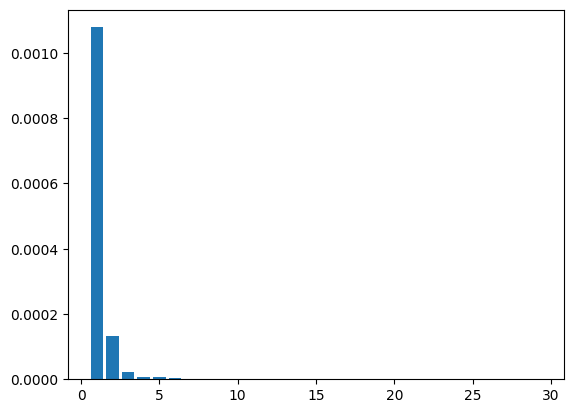

In [105]:
variances = s**2 / (data.shape[0]-1)
explained_variances = variances / np.sum(variances)

var_mean = explained_variances.mean(axis=0)

plt.bar(range(1, len(var_mean)+1), var_mean)

In [109]:
ndims = 7

b = u[:,:,:ndims] * s[:,None,:ndims] # reduced data
print(b.shape)
reconstructed = b @ vh[:,:ndims,:]
print(reconstructed.shape) # reconstructed data

(800, 100, 7)
(800, 100, 29)


Text(0.5, 1.0, 'Reconstructed data')

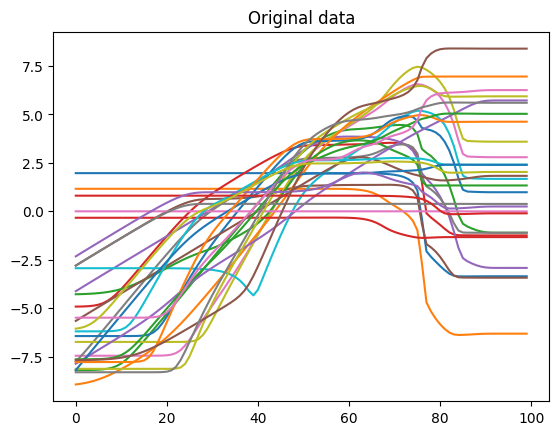

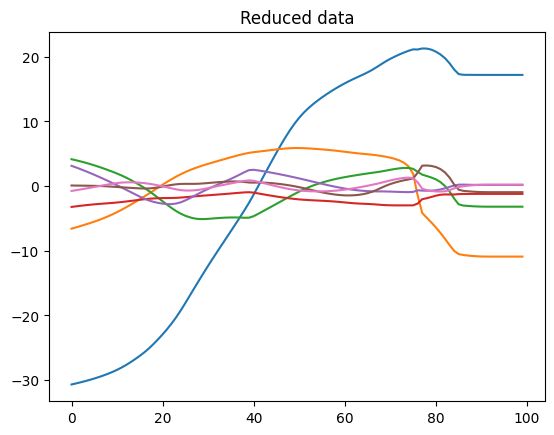

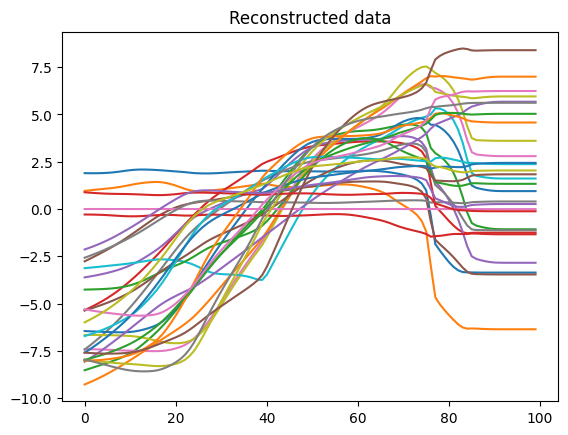

In [110]:
def plot_data(data):
    plt.figure()
    species = data.shape[-1]
    for i in range(species):
        plt.plot(data[:,i])

idx = 0
plot_data(data[idx])
plt.title("Original data")
plot_data(b[idx])
plt.title("Reduced data")
plot_data(reconstructed[idx])
plt.title("Reconstructed data")

In [111]:
latent_trajectories = []
for i in range(b.shape[0]):
    latent_trajectories.append(b[i])

t_steps = np.linspace(0, 1, 100)

In [ ]:
x_dot_list = []
x_dot = ps.SmoothedFiniteDifference()._differentiate(b, t=0.01)
for i in range(x_dot.shape[0]):
    x_dot_list.append(x_dot[i])
model = ps.SINDy()
model.fit(latent_trajectories, t=t_steps, x_dot=x_dot_list)
model.print()

(x0)' = 0.450 1 + 0.023 x3 + -0.647 x4 + 1.861 x5 + 0.391 x6 + 0.851 x7 + -0.040 x8 + -0.406 x9 + -1.454 x10 + 1.045 x11 + 1.243 x12 + 1.681 x13 + -0.071 x15 + -0.516 x16 + -0.932 x17 + 0.773 x18 + -5.393 x19 + 6.097 x20 + 2.412 x21 + 8.926 x22 + -3.135 x23 + 5.687 x24 + -0.042 x25 + 40.732 x26 + 29.002 x27 + 1140.818 x28 + -0.108 x0 x5 + -0.178 x0 x8 + 0.190 x0 x10 + 0.196 x0 x12 + -0.186 x0 x14 + -0.238 x0 x17 + 0.228 x0 x18 + 0.644 x0 x21 + 0.774 x0 x22 + -0.077 x0 x23 + 0.501 x0 x24 + 0.678 x0 x25 + 1.062 x0 x26 + -0.187 x0 x27 + 0.929 x0 x28 + 0.119 x1 x7 + -0.133 x1 x15 + -0.428 x1 x16 + 0.112 x1 x17 + -0.028 x1 x18 + 0.307 x1 x20 + 1.657 x1 x21 + -0.382 x1 x23 + 2.765 x1 x24 + -0.525 x1 x25 + 3.999 x1 x26 + -5.030 x1 x27 + -19.864 x1 x28 + -0.515 x2 x4 + -0.482 x2 x5 + 0.499 x2 x7 + -0.357 x2 x8 + 0.220 x2 x11 + -0.409 x2 x12 + 0.176 x2 x13 + -1.170 x2 x14 + -1.183 x2 x15 + 1.047 x2 x16 + 0.994 x2 x17 + 1.135 x2 x18 + -4.748 x2 x19 + 2.203 x2 x20 + 0.025 x2 x21 + 0.555 x2 x22 + 

In [ ]:
ode_lib = ps.PDELibrary(
    function_library=ps.PolynomialLibrary(degree=3,include_bias=True),
    # temporal_grid=t_steps,
    interaction_only=False,
    include_bias=True,
    )

optimizer = ps.SR3(
    threshold=0.02, thresholder="l2", max_iter=1000, normalize_columns=False, tol=1e-1
)

model = ps.SINDy(feature_library=ode_lib, optimizer=optimizer)
model.fit(latent_trajectories)
model.print()

/export/data/isulzer/DON-vs-NODE/.venv/lib/python3.10/site-packages/pysindy/utils/axes.py:126: AxesWarning: 2 axes labeled for array with 1 axes
  warnings.warn(


(x0)' = 0.018 1 + 0.018 1 + -0.001 x2 + -0.001 x3 + 0.001 x4 + -0.002 x6 + -0.002 x5^2 + -0.001 x5 x6 + 0.003 x6^2 + -0.001 x3^2 x6 + -0.001 x5^2 x6 + 0.001 x6^3
(x1)' = 0.005 1 + 0.005 1 + 0.005 x2 + 0.001 x3 + 0.002 x4 + -0.001 x5 + 0.006 x6 + 0.001 x2^2 + 0.001 x2 x3 + 0.001 x2 x6 + 0.002 x3^2 + -0.001 x4^2 + -0.001 x5^2 + -0.002 x5 x6 + 0.001 x6^2 + -0.002 x2 x5^2 + 0.001 x2 x5 x6 + 0.001 x2 x6^2 + 0.001 x3 x5 x6 + 0.001 x3 x6^2 + 0.001 x4^2 x5 + -0.001 x4 x5^2 + -0.001 x5 x6^2 + -0.001 x6^3
(x2)' = 0.003 1 + 0.003 1 + -0.001 x3 + 0.001 x5 + -0.002 x6 + 0.002 x6^2 + -0.001 x2 x6^2
(x3)' = -0.001 1 + -0.001 1 + -0.001 x4 + -0.001 x5 + 0.001 x6 + -0.001 x3 x6 + -0.001 x5 x6 + -0.001 x1 x6^2 + 0.001 x2 x6^2 + -0.001 x3 x5^2 + -0.001 x3 x5 x6 + 0.001 x6^3
(x4)' = 0.002 x2 + -0.002 x3 + 0.004 x4 + 0.001 x5 + 0.001 x6 + 0.001 x2 x4 + 0.001 x6^3
(x5)' = 0.001 1 + 0.001 1 + 0.002 x5 + 0.001 x6 + 0.001 x5 x6 + -0.001 x5^2 x6
(x6)' = 0.003 x6 + 0.001 x2 x6


In [ ]:
lib = ps.PolynomialLibrary(degree=3, interaction_only=False)
model = ps.SINDy(
    feature_library=lib,
    t_default=0.01,
    discrete_time=False,
)
model.fit(x=latent_trajectories, t=t_steps)
model.print()
lib.get_feature_names()

In [112]:
lib = ps.ConcatLibrary([
    ps.PolynomialLibrary(degree=3, interaction_only=False),
    ps.FourierLibrary(n_frequencies=8)
])

model = ps.SINDy(
    feature_library=lib,
    t_default=0.01,
    discrete_time=False,
)
model.fit(x=latent_trajectories, t=t_steps)
model.print()
lib.get_feature_names()

(x0)' = 117799.644 1 + -1.613 x0 + 10.954 x2 + -10.348 x3 + -2.675 x4 + 21.712 x5 + 522773.801 x6 + -0.154 x0^2 + 0.384 x0 x2 + 0.139 x0 x6 + -0.601 x1^2 + 0.184 x1 x6 + 1.810 x2^2 + 0.633 x2 x3 + 3.352 x3^2 + -0.405 x3 x5 + 2.912 x4^2 + 0.186 x4 x5 + -4.504 x5^2 + -3.191 x5 x6 + -37947.805 x6^2 + -0.117 x0 x3^2 + -0.108 x0 x4^2 + -0.200 x1^2 x2 + 0.136 x1^2 x6 + -0.123 x1 x2 x6 + -0.103 x1 x3 x6 + 0.154 x1 x5^2 + 0.555 x1 x5 x6 + -0.429 x1 x6^2 + 0.223 x2^3 + 0.163 x2^2 x3 + -1.007 x2 x3^2 + -0.370 x2 x4^2 + -0.224 x2 x4 x5 + 0.150 x2 x4 x6 + -0.430 x2 x5^2 + 1.810 x2 x6^2 + 0.855 x3^3 + -0.189 x3^2 x4 + -1.534 x3^2 x6 + 0.152 x3 x4^2 + -0.798 x3 x6^2 + 0.331 x4^3 + -0.460 x4^2 x6 + -0.525 x4 x5 x6 + -0.570 x4 x6^2 + -2.153 x5^3 + -1.313 x5^2 x6 + -0.634 x5 x6^2 + -57275.780 x6^3 + -2.055 sin(1 x0) + 1.068 cos(1 x0) + 1.948 sin(1 x1) + -1.446 cos(1 x1) + -3.310 sin(1 x2) + -10.298 cos(1 x2) + 9.387 sin(1 x3) + 9.691 cos(1 x3) + 4.985 sin(1 x4) + 14.671 cos(1 x4) + -25.989 sin(1 x5) + 

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x5^2',
 'x5 x6',
 'x6^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0^2 x3',
 'x0^2 x4',
 'x0^2 x5',
 'x0^2 x6',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x1 x3',
 'x0 x1 x4',
 'x0 x1 x5',
 'x0 x1 x6',
 'x0 x2^2',
 'x0 x2 x3',
 'x0 x2 x4',
 'x0 x2 x5',
 'x0 x2 x6',
 'x0 x3^2',
 'x0 x3 x4',
 'x0 x3 x5',
 'x0 x3 x6',
 'x0 x4^2',
 'x0 x4 x5',
 'x0 x4 x6',
 'x0 x5^2',
 'x0 x5 x6',
 'x0 x6^2',
 'x1^3',
 'x1^2 x2',
 'x1^2 x3',
 'x1^2 x4',
 'x1^2 x5',
 'x1^2 x6',
 'x1 x2^2',
 'x1 x2 x3',
 'x1 x2 x4',
 'x1 x2 x5',
 'x1 x2 x6',
 'x1 x3^2',
 'x1 x3 x4',
 'x1 x3 x5',
 'x1 x3 x6',
 'x1 x4^2',
 'x1 x4 x5',
 'x1 x4 x6',
 'x1 x5^2',
 'x1 x5 x6',
 'x1 x6^2',
 'x2^3',
 'x2^2 x3',
 'x2^2 x4',
 'x2^2 x5',
 'x2^2 x6',
 'x2 x3^

In [116]:
index = 0
z_pred = model.simulate(
    x0=b[index, 0],
    # t=100,
    t=t_steps,
    integrator="solve_ivp",
    # integrator_kws={'atol': 1e-8, 'method': 'BDF', 'rtol': 1e-8}
)
print(z_pred.shape)
x_pred = z_pred @ vh[index,:ndims,:] # decode
print(x_pred.shape)

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1276210510856D+00   r2 =  0.1236585915300D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1276210510856D+00   r2 =  0.1236585915300D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1276210510856D+00   r2 =  0.1236585915300D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1276210510856D+00   r2 =  0.1236585915300D-16
 lsoda--  warning..internal t (=r1) 

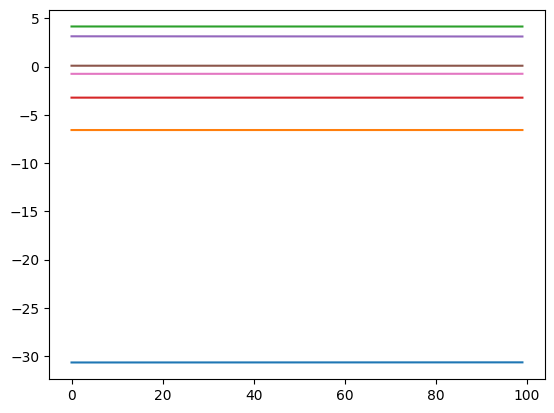

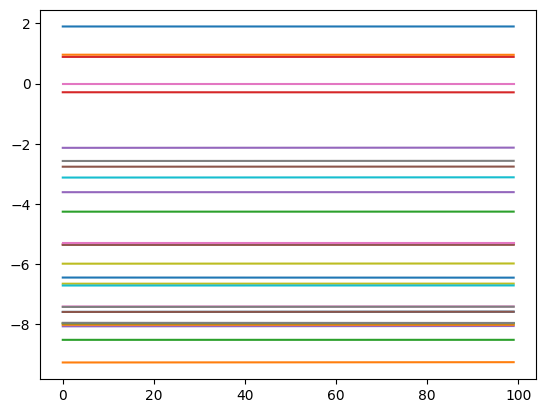

In [ ]:
plt.plot(z_pred)
plt.figure()
plt.plot(x_pred)